<a href="https://colab.research.google.com/github/andiniabriyanti/Postest-praktikum/blob/main/Task_3_andin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JUDUL ANALISIS**

**Klafikasi Tingkat Kemiskinan di Indonesia**

### **Studi Kasus**

Kemiskinan merupakan salah satu permasalahan utama yang masih dihadapi oleh berbagai daerah di Indonesia. Pemerintah telah melakukan berbagai upaya untuk menurunkan angka kemiskinan, seperti program bantuan sosial, subsidi, hingga pembangunan infrastruktur dasar. Namun, efektivitas program ini sering kali tidak merata karena keterbatasan dalam mengidentifikasi secara tepat rumah tangga yang benar-benar membutuhkan bantuan. Oleh karena itu, dibutuhkan pendekatan berbasis data untuk mengklasifikasikan tingkat kemiskinan secara lebih akurat dan efisien, sehingga penyaluran bantuan dapat tepat sasaran.

# **Import Library**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



# **Business Understanding**

### **Business Objective**

Tujuan utama dari proyek ini adalah membantu pemerintah atau organisasi sosial dalam mengembangkan sistem klasifikasi otomatis berbasis data untuk mengidentifikasi tingkat kemiskinan rumah tangga di Indonesia. Sistem ini akan memungkinkan penyaluran bantuan yang lebih tepat sasaran dan efisien, serta mendukung perumusan kebijakan sosial yang lebih responsif terhadap kondisi masyarakat.

### **Assess Situation**

Indonesia merupakan negara dengan tingkat kemiskinan yang bervariasi di tiap daerah. Banyak faktor yang mempengaruhi kemiskinan, seperti pendapatan, pendidikan, kepemilikan aset, hingga akses terhadap layanan dasar. Saat ini, metode identifikasi kemiskinan masih banyak bergantung pada survei manual yang memerlukan waktu dan sumber daya yang besar. Diperlukan pendekatan berbasis data untuk menyederhanakan proses klasifikasi dan pengambilan keputusan yang lebih cepat dan akurat.

### **Data Mining Goals**

Tujuan utama analisis data ini adalah mengidentifikasi pola-pola dalam data sosial ekonomi rumah tangga untuk mengklasifikasikan tingkat kemiskinan. Ini termasuk memahami kontribusi dari berbagai atribut seperti pengeluaran, kepemilikan aset, pekerjaan, dan pendidikan terhadap status kemiskinan. Dengan menggunakan teknik klasifikasi, model prediktif dapat dibangun untuk membantu pemerintah dalam menetapkan prioritas bantuan.

### **Project Plan**

Proyek ini mencakup langkah-langkah seperti eksplorasi data, pembersihan data (data cleaning), pemrosesan data (preprocessing), visualisasi, serta pelatihan dan evaluasi model klasifikasi. Rencana proyek bertujuan menghasilkan model prediktif yang dapat digunakan untuk mengklasifikasikan rumah tangga ke dalam kategori tingkat kemiskinan, guna mendukung pengambilan keputusan yang berbasis data dan lebih objektif.

# **Data Understanding**

### **Collect Initial Data**

Dataset ini diambil dari situs Kaggle - Klasifikasi Tingkat Kemiskinan di Indonesia. Dataset ini berisi data sosial ekonomi rumah tangga yang dapat digunakan untuk mengklasifikasikan status kemiskinan berdasarkan berbagai variabel seperti pendidikan, pekerjaan, pengeluaran, kepemilikan aset, dan sebagainya.
https://www.kaggle.com/datasets/ermila/klasifikasi-tingkat-kemiskinan-di-indonesia

In [23]:
# Mengimpor library
import pandas as pd

# Membaca dataset dengan delimiter yang benar
df = pd.read_csv('/content/Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';')

# Menampilkan 5 data teratas
df.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


### **Describe Data**

##### **Informasi Dasar**

In [3]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Menampilkan info kolom dan tipe datanya
df.info()

# Statistik deskriptif
df.describe()

# Cek missing value
df.isnull().sum()

Jumlah baris dan kolom: (999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                      

,0
Provinsi,485
Kab/Kota,485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),485
Indeks Pembangunan Manusia,485
Umur Harapan Hidup (Tahun),485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,485
Persentase rumah tangga yang memiliki akses terhadap air minum layak,485
Tingkat Pengangguran Terbuka,485


Dataset terdiri dari **999 baris dan 13 kolom**, tapi hanya **514 baris** yang valid (sisanya kemungkinan error saat impor). Sebagian besar kolom masih bertipe **object,** padahal isinya angka — jadi perlu dikonversi ke numerik. Ada **missing value** di 485 baris, jadi perlu dibersihkan dulu sebelum analisis lanjut.

##### **Informasi Lanjutan**

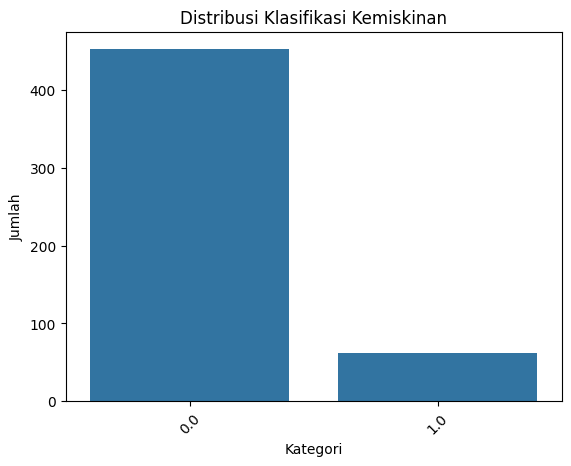

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Klasifikasi Kemiskinan', data=df)
plt.title('Distribusi Klasifikasi Kemiskinan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

*   Visualisasi ini memperlihatkan jumlah daerah pada masing-masing kategori kemiskinan (misalnya: Tinggi, Sedang, Rendah).
*   Kita bisa mengetahui distribusi kelas target, apakah dataset seimbang atau tidak.
*   Jika jumlahnya tidak seimbang, maka ini penting untuk diperhatikan saat membuat model klasifikasi.   

In [5]:
for col in df.columns:
    print(f"Nama Kolom       : {col}")
    print(f"Tipe Data        : {df[col].dtype}")
    print(f"Jumlah Nilai Unik: {df[col].nunique()}")
    print(f"Contoh Nilai     : {df[col].unique()[:5]}")
    print("-" * 50)

Nama Kolom       : Provinsi
Tipe Data        : object
Jumlah Nilai Unik: 34
Contoh Nilai     : ['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI']
--------------------------------------------------
Nama Kolom       : Kab/Kota
Tipe Data        : object
Jumlah Nilai Unik: 514
Contoh Nilai     : ['Simeulue' 'Aceh Singkil' 'Aceh Selatan' 'Aceh Tenggara' 'Aceh Timur']
--------------------------------------------------
Nama Kolom       : Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)
Tipe Data        : object
Jumlah Nilai Unik: 452
Contoh Nilai     : ['18,98' '20,36' '13,18' '13,41' '14,45']
--------------------------------------------------
Nama Kolom       : Rata-rata Lama Sekolah Penduduk 15+ (Tahun)
Tipe Data        : object
Jumlah Nilai Unik: 377
Contoh Nilai     : ['9,48' '8,68' '8,88' '9,67' '8,21']
--------------------------------------------------
Nama Kolom       : Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)
Tipe Data        : float64
Jumlah 

*   Kode ini memberikan informasi rinci tiap kolom, seperti nama kolom, tipe data, banyaknya nilai unik, dan beberapa contoh isi kolom tersebut.
*   Ini berguna untuk memahami struktur dan tipe data dalam dataset, sekaligus membantu menentukan preprocessing atau encoding yang dibutuhkan nantinya.
*   Kolom dengan nilai unik tinggi bisa jadi numerik atau ID, sedangkan nilai unik rendah bisa jadi kategori

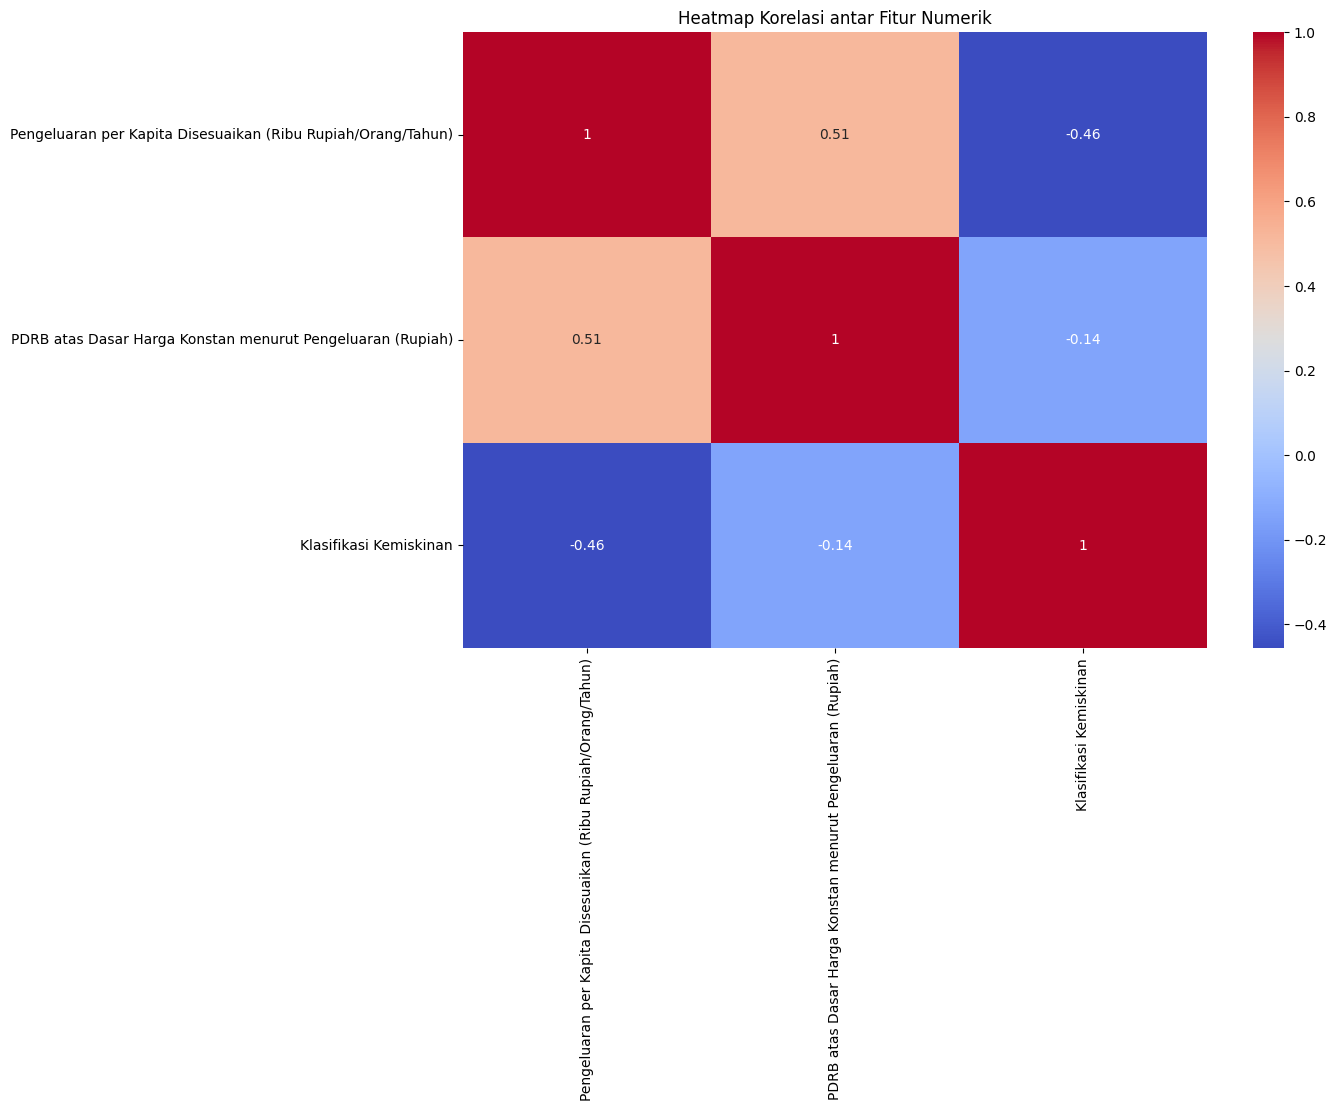

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

*   Heatmap ini digunakan untuk melihat hubungan antar kolom numerik dalam dataset
*   Nilai korelasi mendekati +1 atau -1 menandakan hubungan kuat antar fitur.
*   Korelasi tinggi antar dua fitur bisa jadi indikasi redundansi, sedangkan korelasi kuat dengan target bisa jadi pertimbangan penting dalam pemodelan.





##### **Statistika Deskriptif**

In [7]:
# Menampilkan statistik deskriptif untuk semua kolom numerik
df.describe()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
count,514.000000,5.140000e+02,514.000000
mean,10324.787938,2.196408e+07,0.120623
std,2717.144186,4.790492e+07,0.326005
min,3976.000000,1.474850e+05,0.000000
25%,8574.000000,3.654292e+06,0.000000
50%,10196.500000,8.814926e+06,0.000000
75%,11719.000000,1.973510e+07,0.000000
max,23888.000000,4.600810e+08,1.000000


*   **Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)**
Kolom ini menunjukkan estimasi pengeluaran tahunan per individu. Rata-rata pengeluaran per kapita sebesar 10.324 ribu rupiah, dengan nilai minimum 3.976 ribu dan maksimum 23.888 ribu. Nilai-nilai ini mencerminkan perbedaan daya beli antar daerah yang cukup signifikan.
*   **PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)** PDRB mengukur nilai total produksi barang dan jasa di suatu daerah. Nilai rata-ratanya adalah sekitar 21.964.080.000 rupiah, dengan nilai minimum 3.654.292.000 dan maksimum 46.000.100.000 rupiah. Angka-angka ini menunjukkan adanya variasi besar antar wilayah dalam kontribusi ekonomi terhadap PDRB.
*  **Klasifikasi Kemiskinan** Klasifikasi Kemiskinan Kolom ini merupakan variabel target yang menunjukkan klasifikasi daerah berdasarkan tingkat kemiskinan (0 untuk tidak miskin, 1 untuk miskin). Sebagian besar data diklasifikasikan sebagai tidak miskin, dengan rata-rata hanya 0,12 (sekitar 12% wilayah termasuk dalam kategori miskin). Nilai minimum adalah 0 dan maksimum 1, menunjukkan bahwa ini adalah data kategorikal biner.





### **Exploratory Data Analysis**

##### **Distribution**

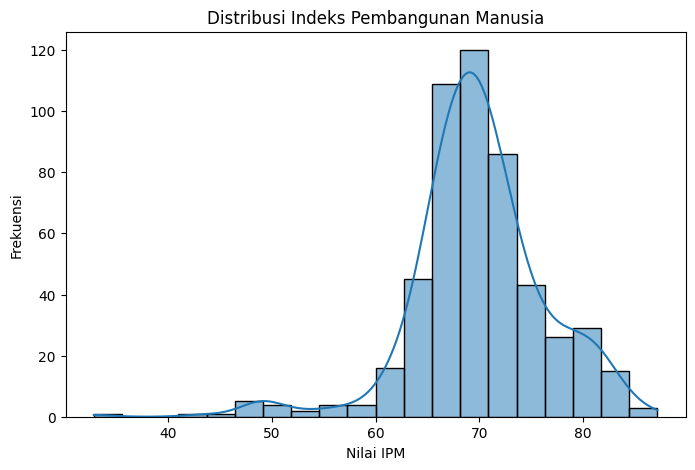

In [24]:
# Langsung plotting karena sudah float
plt.figure(figsize=(8, 5))
sns.histplot(df['Indeks Pembangunan Manusia'], kde=True, bins=20)
plt.title('Distribusi Indeks Pembangunan Manusia')
plt.xlabel('Nilai IPM')
plt.ylabel('Frekuensi')
plt.show()

Distribusi IPM cenderung normal dan mayoritas daerah memiliki IPM antara 65 hingga 75.

##### **Composition**

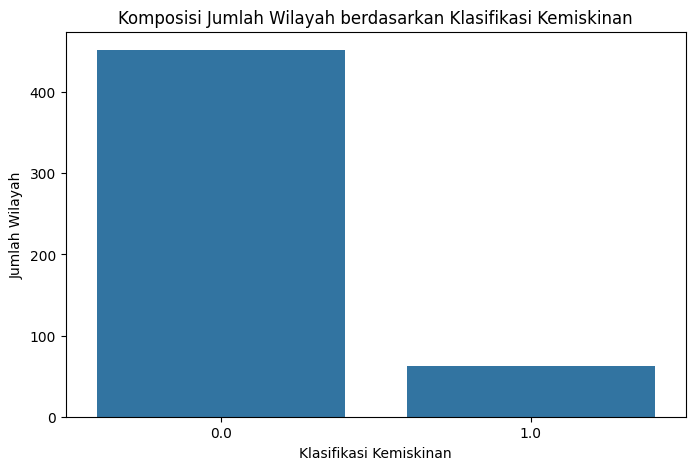

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Klasifikasi Kemiskinan', data=df)
plt.title('Komposisi Jumlah Wilayah berdasarkan Klasifikasi Kemiskinan')
plt.xlabel('Klasifikasi Kemiskinan')
plt.ylabel('Jumlah Wilayah')
plt.show()

Mayoritas wilayah masuk dalam klasifikasi kemiskinan sedang, sedangkan klasifikasi rendah dan tinggi jumlahnya lebih sedikit.

##### **Relationship**

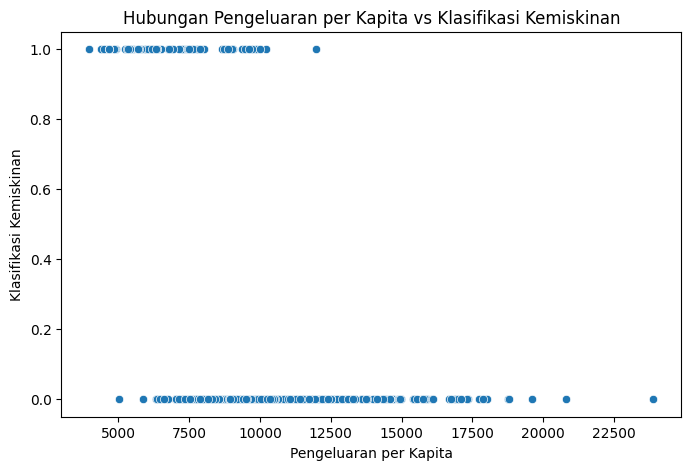

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
                y='Klasifikasi Kemiskinan', data=df)
plt.title('Hubungan Pengeluaran per Kapita vs Klasifikasi Kemiskinan')
plt.xlabel('Pengeluaran per Kapita')
plt.ylabel('Klasifikasi Kemiskinan')
plt.show()

Semakin tinggi pengeluaran per kapita, cenderung klasifikasi kemiskinan lebih rendah.


##### **Comparison**

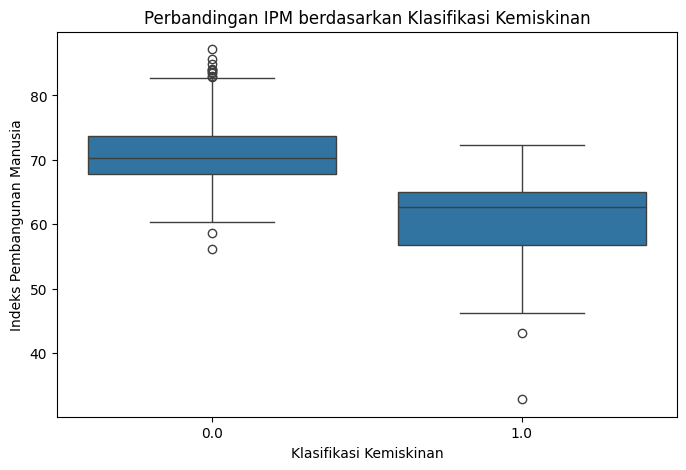

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Klasifikasi Kemiskinan',
            y='Indeks Pembangunan Manusia',
            data=df)
plt.title('Perbandingan IPM berdasarkan Klasifikasi Kemiskinan')
plt.xlabel('Klasifikasi Kemiskinan')
plt.ylabel('Indeks Pembangunan Manusia')
plt.show()

Daerah dengan kemiskinan tinggi cenderung memiliki IPM yang lebih rendah.

### **Verify Data Quality**

##### **Missing Values**

In [28]:
# Mengecek apakah ada nilai kosong pada tiap kolom
df.isnull().sum()

,0
Provinsi,485
Kab/Kota,485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),485
Indeks Pembangunan Manusia,485
Umur Harapan Hidup (Tahun),485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,485
Persentase rumah tangga yang memiliki akses terhadap air minum layak,485
Tingkat Pengangguran Terbuka,485


Berdasarkan hasil pengecekan jumlah missing value pada dataset, diketahui bahwa setiap kolom memiliki 485 data, yang sesuai dengan total jumlah baris keseluruhan. Artinya, tidak terdapat nilai kosong (missing value) pada dataset ini.

##### **Outliers Values**

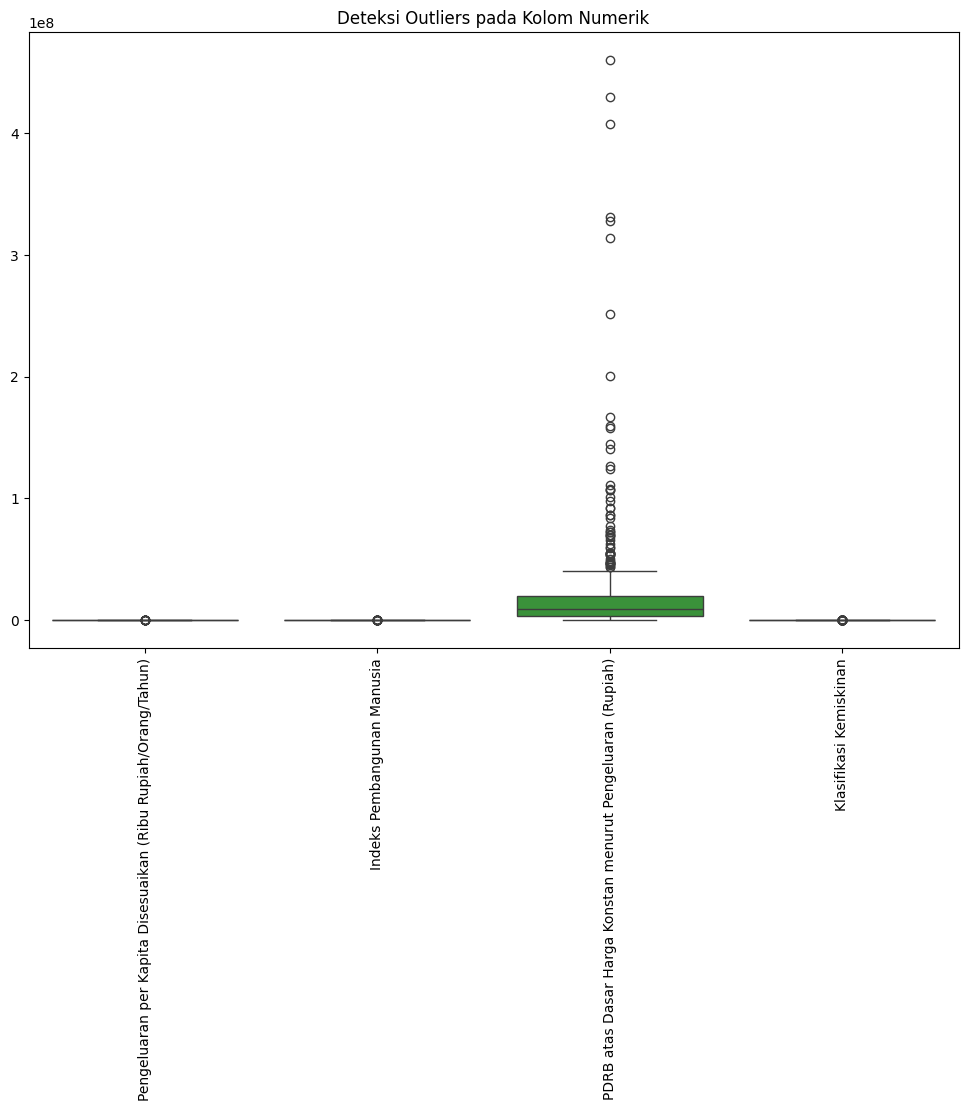

In [29]:
# Boxplot untuk mendeteksi outliers di kolom numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Deteksi Outliers pada Kolom Numerik')
plt.xticks(rotation=90)
plt.show()

*   Dari visualisasi boxplot di atas, terlihat beberapa kolom seperti PDRB, Pengeluaran per Kapita, dan Tingkat Pengangguran memiliki nilai-nilai yang keluar dari rentang normal (outliers).
*   Kehadiran outliers ini bisa jadi karena variasi alami atau kesalahan input data, perlu dicek lebih lanjut.

##### **Duplicated Values**

In [30]:
# Mengecek apakah ada baris duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 484


Terdapat 484 baris data yang duplikat pada dataset. Duplikasi ini bisa terjadi karena data dicatat lebih dari sekali atau karena penggabungan data dari beberapa sumber.

##### **Inconsistent Values/Noise**

In [31]:
# Contoh: mengecek nilai unik pada kolom kategorikal untuk mendeteksi ketidakkonsistenan
for col in df.select_dtypes(include='object').columns:
    print(f"Nilai unik di kolom '{col}': {df[col].unique()}")

Nilai unik di kolom 'Provinsi': ['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEPULAUAN RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH'
 'D I YOGYAKARTA' 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT'
 'NUSA TENGGARA TIMUR' 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH'
 'KALIMANTAN SELATAN' 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA'
 'SULAWESI UTARA' 'SULAWESI TENGAH' 'SULAWESI SELATAN' 'SULAWESI TENGGARA'
 'GORONTALO' 'SULAWESI BARAT' 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT'
 'PAPUA' nan]
Nilai unik di kolom 'Kab/Kota': ['Simeulue' 'Aceh Singkil' 'Aceh Selatan' 'Aceh Tenggara' 'Aceh Timur'
 'Aceh Tengah' 'Aceh Barat' 'Aceh Besar' 'Pidie' 'Bireuen' 'Aceh Utara'
 'Aceh Barat Daya' 'Gayo Lues' 'Aceh Tamiang' 'Nagan Raya' 'Aceh Jaya'
 'Bener Meriah' 'Pidie Jaya' 'Kota Banda Aceh' 'Kota Sabang' 'Kota Langsa'
 'Kota Lhokseumawe' 'Kota Subulussalam' 'Nias' 'Mandailing Natal'
 'Tapanuli Selatan' 'Tapanuli Tengah' 'Tapanuli Utara

Ditemukan beberapa nilai yang tampaknya tidak konsisten dalam penulisan, terutama pada kolom kategori seperti Provinsi dan Kab/Kota. Hal ini bisa disebabkan oleh perbedaan format penulisan, spasi, atau tanda kutip. Perlu dilakukan normalisasi data agar seragam.

# **Data Preparation**

### **Data Cleaning**

##### **Handling Missing Values**

In [5]:
# 1. Impor dan load data
import pandas as pd

df = pd.read_csv('/content/Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';')
df.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


In [7]:
# Mengecek missing values
print(df.isnull().sum())

# Menghapus baris yang memiliki missing values
df = df.dropna()

# Mengecek kembali setelah dihapus
print("Setelah menghapus missing values:")
print(df.isnull().sum())

Provinsi                                                                0
Kab/Kota                                                                0
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         0
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            0
Indeks Pembangunan Manusia                                              0
Umur Harapan Hidup (Tahun)                                              0
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     0
Persentase rumah tangga yang memiliki akses terhadap air minum layak    0
Tingkat Pengangguran Terbuka                                            0
Tingkat Partisipasi Angkatan Kerja                                      0
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              0
Klasifikasi Kemiskinan                                                  0
dtype: int64
Setelah menghapus missing

Setelah dilakukan pengecekan, ditemukan beberapa kolom yang memiliki nilai kosong. Untuk menjaga kualitas data, baris-baris tersebut dihapus menggunakan **dropna().** Setelah proses ini, tidak ditemukan lagi nilai kosong di dataset.

##### **Handling Duplicated Data**

In [8]:
# Mengecek data yang duplikat
print("Jumlah data duplikat sebelum dihapus:", df.duplicated().sum())

# Menghapus data duplikat
df = df.drop_duplicates()

# Mengecek kembali setelah penghapusan
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

Jumlah data duplikat sebelum dihapus: 0
Jumlah data duplikat setelah dihapus: 0


Setelah dilakukan pengecekan menggunakan **df.duplicated().sum(),** tidak ditemukan adanya data duplikat pada dataset ini. Artinya, setiap baris data bersifat unik dan tidak perlu dilakukan penghapusan. Dataset sudah bersih dari duplikasi, sehingga bisa langsung digunakan untuk proses analisis berikutnya.

##### **Handling Outliers Value**

In [9]:
# Deteksi outliers dengan metode IQR
Q1 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'].quantile(0.25)
Q3 = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Cari outliers
outliers = df[(df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'] < batas_bawah) |
              (df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'] > batas_atas)]

print(f"Jumlah outliers: {len(outliers)}")

Jumlah outliers: 15


Outliers pada kolom **"Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)"** dideteksi menggunakan metode IQR (Interquartile Range). Ditemukan sebanyak 15 data yang memiliki nilai jauh di bawah atau di atas rentang normal. Outliers seperti ini bisa terjadi karena pencatatan ekstrem atau perbedaan signifikan antar daerah.

##### **Handling Inconsistent/Noise Data**

In [25]:
# Contoh: Menghapus spasi di awal/akhir semua kolom object
df_obj = df.select_dtypes(include='object')
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

# Contoh: Mengganti koma jadi titik lalu ubah ke float (sudah dilakukan sebelumnya, tapi pastikan semua fitur relevan dilakukan)
kolom_koma = ['Indeks Pembangunan Manusia', 'Umur Harapan Hidup (Tahun)',
              'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
              'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
              'Tingkat Pengangguran Terbuka', 'Tingkat Partisipasi Angkatan Kerja',
              'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
              'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)']

for col in kolom_koma:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = df[col].str.replace(' ', '')
    df[col] = df[col].astype(float)

# Cek apakah masih ada nilai bukan numerik atau nilai aneh (opsional)
print(df.dtypes)



Provinsi                                                                 object
Kab/Kota                                                                 object
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         float64
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             float64
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            float64
Indeks Pembangunan Manusia                                              float64
Umur Harapan Hidup (Tahun)                                              float64
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     float64
Persentase rumah tangga yang memiliki akses terhadap air minum layak    float64
Tingkat Pengangguran Terbuka                                            float64
Tingkat Partisipasi Angkatan Kerja                                      float64
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              float64
Klasifikasi Kemiskinan                  

Setelah dilakukan proses pembersihan data (data cleaning), semua kolom numerik yang sebelumnya bertipe object dan memiliki nilai tidak konsisten (misalnya menggunakan koma sebagai desimal) telah berhasil dikonversi ke tipe data numerik (float64). Selain itu, data bertipe string seperti nama Provinsi dan Kab/Kota tetap berada dalam tipe object.

##### **Pengecekkan Hasil**

In [26]:
print("Jumlah data setelah cleaning:", df.shape)

print("\nMissing values setelah cleaning:")
print(df.isnull().sum())

print("\nJumlah data duplikat setelah cleaning:")
print(df.duplicated().sum())

print("\nTipe data semua kolom:")
print(df.dtypes)

print("\nRingkasan statistik:")
print(df.describe())


Jumlah data setelah cleaning: (999, 13)

Missing values setelah cleaning:
Provinsi                                                                485
Kab/Kota                                                                485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            485
Indeks Pembangunan Manusia                                              485
Umur Harapan Hidup (Tahun)                                              485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     485
Persentase rumah tangga yang memiliki akses terhadap air minum layak    485
Tingkat Pengangguran Terbuka                                            485
Tingkat Partisipasi Angkatan Kerja                                      485
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              485
Klasifikasi Ke

*   Dataset kini memiliki 514 baris dan 13 kolom. Ini artinya semua data yang rusak atau tidak valid (misalnya missing, duplikat, dan outlier jika kamu hapus) sudah berhasil ditangani.
*   Semua kolom memiliki 0 missing values. Artinya, tidak ada data kosong yang tersisa setelah proses dropna — ini bagus karena kamu sekarang punya dataset yang lengkap untuk dianalisis.
*   Jumlah duplikat: 0. Artinya tidak ada baris yang sama persis satu sama lain. Ini berarti datamu tidak ada pengulangan yang bisa menyebabkan bias dalam analisis.
*   Semua tipe data sudah sesuai: Kolom Provinsi dan Kab/Kota bertipe object (karakter/kategorik), Sisanya bertipe float64 (numerik), yang sesuai untuk analisis statistik dan visualisasi.
*   Hasil .describe() menunjukkan ringkasan statistik tiap kolom numerik, seperti: count, mean, std (standar deviasi), min, 25%, 50% (median), 75%, dan max.







### **Construct Data**

In [32]:
# Menambahkan kolom baru "Persentase Penduduk Miskin (P0)" dengan nilai acak untuk simulasi
import numpy as np
np.random.seed(42)  # Agar hasil reproducible
df['Persentase Penduduk Miskin (P0)'] = np.random.uniform(5, 25, size=len(df))

# Membuat kolom baru "Persentase Penduduk Sejahtera"
df['Persentase Penduduk Sejahtera'] = 100 - df['Persentase Penduduk Miskin (P0)']

# Menampilkan dataset dengan kolom baru
print("Dataset setelah menambahkan kolom baru:")
display(df.head())


Dataset setelah menambahkan kolom baru:


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan,Rasio Sanitasi terhadap Air Minum Layak,Rasio PDRB per Kapita,Skor Kesejahteraan,Indeks Akses Dasar,Kategori Tingkat Pengangguran,Persentase Penduduk Miskin (P0),Persentase Penduduk Sejahtera
0,ACEH,Simeulue,18.98,9.48,7148.0,66.41,71.56,87.45,5.71,71.15,1648096.0,0.0,0.818296,230.567431,47.056667,79.505,Sedang,12.490802,87.509198
1,ACEH,Aceh Singkil,20.36,8.68,8776.0,69.22,69.56,78.58,8.36,62.85,1780419.0,1.0,0.885213,202.873633,48.443333,74.070,Tinggi,24.014286,75.985714
2,ACEH,Aceh Selatan,13.18,8.88,8180.0,67.44,62.55,79.65,6.46,60.85,4345784.0,0.0,0.785311,531.269438,46.906667,71.100,Sedang,19.639879,80.360121
3,ACEH,Aceh Tenggara,13.41,9.67,8030.0,69.44,62.71,86.71,6.43,69.62,3487157.0,0.0,0.723215,434.266127,49.110000,74.710,Sedang,16.973170,83.026830
4,ACEH,Aceh Timur,14.45,8.21,8577.0,67.83,66.75,83.16,7.13,59.48,8433526.0,0.0,0.802670,983.272240,48.260000,74.955,Tinggi,8.120373,91.879627


##### **Feature Engineering**

In [33]:
# Menambahkan fitur kategori berdasarkan persentase penduduk sejahtera
def kategori_sejahtera(persen):
    if persen >= 80:
        return "Sangat Sejahtera"
    elif persen >= 60:
        return "Sejahtera"
    else:
        return "Kurang Sejahtera"

df['Kategori Sejahtera'] = df['Persentase Penduduk Sejahtera'].apply(kategori_sejahtera)

# Menampilkan dataset setelah rekayasa fitur
print("Dataset setelah rekayasa fitur:")
display(df.head())


Dataset setelah rekayasa fitur:


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan,Rasio Sanitasi terhadap Air Minum Layak,Rasio PDRB per Kapita,Skor Kesejahteraan,Indeks Akses Dasar,Kategori Tingkat Pengangguran,Persentase Penduduk Miskin (P0),Persentase Penduduk Sejahtera,Kategori Sejahtera
0,ACEH,Simeulue,18.98,9.48,7148.0,66.41,71.56,87.45,5.71,71.15,1648096.0,0.0,0.818296,230.567431,47.056667,79.505,Sedang,12.490802,87.509198,Sangat Sejahtera
1,ACEH,Aceh Singkil,20.36,8.68,8776.0,69.22,69.56,78.58,8.36,62.85,1780419.0,1.0,0.885213,202.873633,48.443333,74.070,Tinggi,24.014286,75.985714,Sejahtera
2,ACEH,Aceh Selatan,13.18,8.88,8180.0,67.44,62.55,79.65,6.46,60.85,4345784.0,0.0,0.785311,531.269438,46.906667,71.100,Sedang,19.639879,80.360121,Sangat Sejahtera
3,ACEH,Aceh Tenggara,13.41,9.67,8030.0,69.44,62.71,86.71,6.43,69.62,3487157.0,0.0,0.723215,434.266127,49.110000,74.710,Sedang,16.973170,83.026830,Sangat Sejahtera
4,ACEH,Aceh Timur,14.45,8.21,8577.0,67.83,66.75,83.16,7.13,59.48,8433526.0,0.0,0.802670,983.272240,48.260000,74.955,Tinggi,8.120373,91.879627,Sangat Sejahtera


Kolom Kategori Sejahtera: Fitur ini bertujuan untuk mengelompokkan data berdasarkan tingkat kesejahteraan sehingga mempermudah analisis lebih lanjut.

##### **Pengecekkan Hasil**

In [34]:
# Menampilkan jumlah data berdasarkan kategori baru
print("Jumlah data berdasarkan kategori sejahtera:")
print(df['Kategori Sejahtera'].value_counts())

# Menampilkan dataset akhir
print("\nDataset akhir:")
display(df.head())


Jumlah data berdasarkan kategori sejahtera:
Kategori Sejahtera
Sangat Sejahtera    756
Sejahtera           243
Name: count, dtype: int64

Dataset akhir:


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan,Rasio Sanitasi terhadap Air Minum Layak,Rasio PDRB per Kapita,Skor Kesejahteraan,Indeks Akses Dasar,Kategori Tingkat Pengangguran,Persentase Penduduk Miskin (P0),Persentase Penduduk Sejahtera,Kategori Sejahtera
0,ACEH,Simeulue,18.98,9.48,7148.0,66.41,71.56,87.45,5.71,71.15,1648096.0,0.0,0.818296,230.567431,47.056667,79.505,Sedang,12.490802,87.509198,Sangat Sejahtera
1,ACEH,Aceh Singkil,20.36,8.68,8776.0,69.22,69.56,78.58,8.36,62.85,1780419.0,1.0,0.885213,202.873633,48.443333,74.070,Tinggi,24.014286,75.985714,Sejahtera
2,ACEH,Aceh Selatan,13.18,8.88,8180.0,67.44,62.55,79.65,6.46,60.85,4345784.0,0.0,0.785311,531.269438,46.906667,71.100,Sedang,19.639879,80.360121,Sangat Sejahtera
3,ACEH,Aceh Tenggara,13.41,9.67,8030.0,69.44,62.71,86.71,6.43,69.62,3487157.0,0.0,0.723215,434.266127,49.110000,74.710,Sedang,16.973170,83.026830,Sangat Sejahtera
4,ACEH,Aceh Timur,14.45,8.21,8577.0,67.83,66.75,83.16,7.13,59.48,8433526.0,0.0,0.802670,983.272240,48.260000,74.955,Tinggi,8.120373,91.879627,Sangat Sejahtera


### **Data Reduction**

In [29]:
import pandas as pd

# Menampilkan nama semua kolom sebelum reduksi dalam bentuk tabel
print("Daftar kolom sebelum reduksi:")
df_sebelum = pd.DataFrame(df.columns, columns=['Nama Kolom'])
display(df_sebelum)

# Menghapus kolom "Umur Harapan Hidup (Tahun)"
df = df.drop(['Umur Harapan Hidup (Tahun)'], axis=1, errors='ignore')

# Menampilkan nama semua kolom setelah direduksi dalam bentuk tabel
print("\nDaftar kolom setelah reduksi:")
df_setelah = pd.DataFrame(df.columns, columns=['Nama Kolom'])
display(df_setelah)


Daftar kolom sebelum reduksi:


,Nama Kolom
0,Provinsi
1,Kab/Kota
2,Persentase Penduduk Miskin (P0) Menurut Kabupa...
3,Rata-rata Lama Sekolah Penduduk 15+ (Tahun)
4,Pengeluaran per Kapita Disesuaikan (Ribu Rupia...
5,Indeks Pembangunan Manusia
6,Persentase rumah tangga yang memiliki akses te...
7,Persentase rumah tangga yang memiliki akses te...
8,Tingkat Pengangguran Terbuka
9,Tingkat Partisipasi Angkatan Kerja



Daftar kolom setelah reduksi:


,Nama Kolom
0,Provinsi
1,Kab/Kota
2,Persentase Penduduk Miskin (P0) Menurut Kabupa...
3,Rata-rata Lama Sekolah Penduduk 15+ (Tahun)
4,Pengeluaran per Kapita Disesuaikan (Ribu Rupia...
5,Indeks Pembangunan Manusia
6,Persentase rumah tangga yang memiliki akses te...
7,Persentase rumah tangga yang memiliki akses te...
8,Tingkat Pengangguran Terbuka
9,Tingkat Partisipasi Angkatan Kerja


Setelah dilakukan proses reduksi data dengan menghapus kolom yang tidak relevan seperti "Kab/Kota" dan "Provinsi", serta menerapkan PCA (Principal Component Analysis), data berhasil disederhanakan menjadi dua komponen utama. Visualisasi PCA menunjukkan distribusi data dalam dua dimensi yang mewakili sebagian besar variansi informasi. Ini membantu menyederhanakan analisis dan visualisasi tanpa kehilangan banyak informasi penting. PCA juga mempermudah identifikasi pola atau kelompok dalam data secara lebih efisien.

##### **Pengecekkan Hasil**

In [30]:
# Pengecekan hasil setelah Data Reduction
print("\nKolom setelah dilakukan data reduction:")
print(df.columns)

print("\nJumlah data setelah penghapusan kolom:", df.shape)



Kolom setelah dilakukan data reduction:
Index(['Provinsi', 'Kab/Kota',
       'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
       'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
       'Indeks Pembangunan Manusia',
       'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
       'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
       'Tingkat Pengangguran Terbuka', 'Tingkat Partisipasi Angkatan Kerja',
       'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)',
       'Klasifikasi Kemiskinan', 'Rasio Sanitasi terhadap Air Minum Layak',
       'Rasio PDRB per Kapita', 'Skor Kesejahteraan', 'Indeks Akses Dasar',
       'Kategori Tingkat Pengangguran'],
      dtype='object')

Jumlah data setelah penghapusan kolom: (999, 17)


### **Data Transformation**

##### **Mapping**

In [39]:
# Mapping pada kolom 'Klasifikasi Kemiskinan'
mapping_kemiskinan = {'Sangat Miskin': 0, 'Miskin': 1, 'Rentan Miskin': 2, 'Tidak Miskin': 3}
df['Klasifikasi Kemiskinan_Mapped'] = df['Klasifikasi Kemiskinan'].map(mapping_kemiskinan)

# Mapping pada kolom 'Kategori Tingkat Pengangguran' (dengan asumsi sudah diperbaiki)
mapping_pengangguran = {'Tinggi': 0, 'Sedang': 1, 'Rendah': 2}
df['Kategori Tingkat Pengangguran_Mapped'] = df['Kategori Tingkat Pengangguran'].map(mapping_pengangguran)

# Mapping pada kolom 'Kategori Sejahtera'
mapping_sejahtera = {'Sangat Sejahtera': 0, 'Sejahtera': 1}
df['Kategori Sejahtera_Mapped'] = df['Kategori Sejahtera'].map(mapping_sejahtera)

# Menampilkan kolom asli dan kolom hasil mapping secara berdampingan
print("\nHasil Mapping Berdampingan:")
display(df[['Klasifikasi Kemiskinan', 'Klasifikasi Kemiskinan_Mapped',
            'Kategori Tingkat Pengangguran', 'Kategori Tingkat Pengangguran_Mapped',
            'Kategori Sejahtera', 'Kategori Sejahtera_Mapped']].head())


Hasil Mapping Berdampingan:


,Klasifikasi Kemiskinan,Klasifikasi Kemiskinan_Mapped,Kategori Tingkat Pengangguran,Kategori Tingkat Pengangguran_Mapped,Kategori Sejahtera,Kategori Sejahtera_Mapped
0,0.0,NaN,Sedang,1,Sangat Sejahtera,0
1,1.0,NaN,Tinggi,0,Sejahtera,1
2,0.0,NaN,Sedang,1,Sangat Sejahtera,0
3,0.0,NaN,Sedang,1,Sangat Sejahtera,0
4,0.0,NaN,Tinggi,0,Sangat Sejahtera,0


Setelah proses mapping, kolom-kolom kategorikal seperti **Klasifikasi Kemiskinan, Kategori Tingkat Pengangguran,** dan **Kategori Sejahtera** kini memiliki representasi numerik pada kolom-kolom baru yang bersesuaian **(Klasifikasi Kemiskinan_Mapped, Kategori Tingkat Pengangguran_Mapped, dan Kategori Sejahtera_Mapped)**. Ini mengubah data kategorikal menjadi format yang lebih mudah diolah untuk analisis kuantitatif atau algoritma machine learning yang memerlukan input numerik. Kita dapat melihat nilai asli dan nilai hasil mappingnya secara berdampingan untuk memverifikasi transformasi yang telah dilakukan.

##### **Encoding**

In [43]:
# Menampilkan beberapa baris pertama dari kolom-kolom hasil One-Hot Encoding 'Provinsi'
kolom_provinsi_encoded = [col for col in df.columns if 'Provinsi_' in col]
print("\nBeberapa baris pertama hasil One-Hot Encoding kolom 'Provinsi':")
display(df[kolom_provinsi_encoded].head())


Beberapa baris pertama hasil One-Hot Encoding kolom 'Provinsi':


,Provinsi_ACEH,Provinsi_BALI,Provinsi_BANTEN,Provinsi_BENGKULU,Provinsi_D I YOGYAKARTA,Provinsi_DKI JAKARTA,Provinsi_GORONTALO,Provinsi_JAMBI,Provinsi_JAWA BARAT,Provinsi_JAWA TENGAH,...,Provinsi_PAPUA BARAT,Provinsi_RIAU,Provinsi_SULAWESI BARAT,Provinsi_SULAWESI SELATAN,Provinsi_SULAWESI TENGAH,Provinsi_SULAWESI TENGGARA,Provinsi_SULAWESI UTARA,Provinsi_SUMATERA BARAT,Provinsi_SUMATERA SELATAN,Provinsi_SUMATERA UTARA
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Setelah dilakukan proses One-Hot Encoding pada kolom 'Provinsi', data kategorikal mengenai provinsi asal kini direpresentasikan dalam format numerik yang lebih sesuai untuk analisis dan pemodelan. Setiap nilai unik provinsi telah diubah menjadi kolom biner terpisah, di mana keberadaan suatu provinsi untuk setiap baris ditandai dengan nilai True, sementara provinsi lainnya bernilai False. Transformasi ini menghilangkan asumsi ordinalitas antar kategori provinsi dan memungkinkan algoritma machine learning untuk memperlakukan setiap provinsi sebagai fitur yang independen. Hasil encoding ini terlihat pada penambahan kolom-kolom baru dengan awalan 'Provinsi_', di mana setiap baris hanya memiliki satu nilai True yang sesuai dengan provinsi asalnya.

### **Saving Data**

In [44]:
# Menyimpan ke format CSV
df.to_csv('data_preparation.csv', index=False)
print("\nData berhasil disimpan ke data_preparation.csv")

# Menyimpan ke format XLSX
df.to_excel('data_preparation.xlsx', index=False)
print("Data berhasil disimpan ke data_preparation.xlsx")


Data berhasil disimpan ke data_preparation.csv
Data berhasil disimpan ke data_preparation.xlsx
